In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('placement (1).csv')
df.shape
df.sample(5)

,cgpa,placement_exam_marks,placed
387,7.25,7.0,1
864,6.32,5.0,0
256,7.37,48.0,1
813,7.43,52.0,1
436,6.31,19.0,0


/tmp/ipython-input-2440719432.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


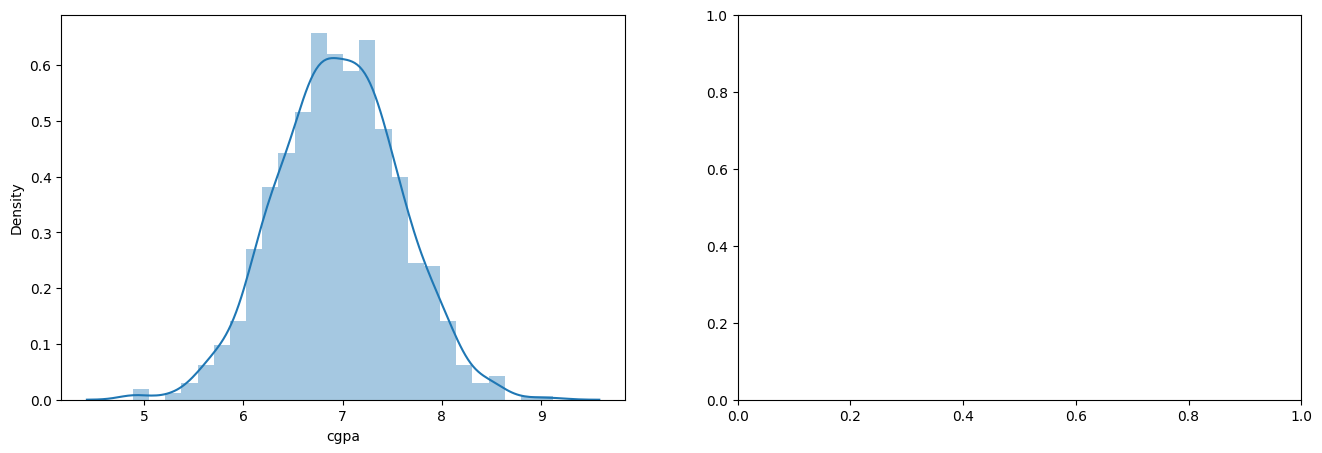

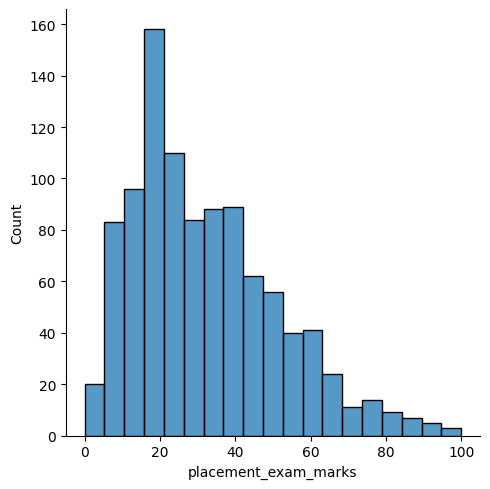

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.displot(df['placement_exam_marks'])
plt.show()

In [9]:
print('mean value of cgpa',df['cgpa'].mean())
print('std value of cgpa',df['cgpa'].std())
print('min value of cgpa',df['cgpa'].min())
print('max value of cgpa',df['cgpa'].max())

mean value of cgpa 6.96124
std value of cgpa 0.6158978751323894
min value of cgpa 4.89
max value of cgpa 9.12


In [14]:
print("Highest allowed",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [16]:
df[(df['cgpa']>8.80)|(df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [20]:
new_df=df[(df['cgpa']<8.80)&(df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [24]:
df['cgpa_zscore']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
print(df)

     cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.19                  26.0       1     0.371425
1    7.46                  38.0       1     0.809810
2    7.54                  40.0       1     0.939701
3    6.42                   8.0       1    -0.878782
4    7.23                  17.0       0     0.436371
..    ...                   ...     ...          ...
995  8.87                  44.0       1     3.099150
996  9.12                  65.0       1     3.505062
997  4.89                  34.0       0    -3.362960
998  8.62                  46.0       1     2.693239
999  4.90                  10.0       1    -3.346724

[1000 rows x 4 columns]


In [25]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [26]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [27]:
df[(df['cgpa_zscore']>3)|(df['cgpa_zscore']<-3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [30]:
new_df=df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]
print(new_df)

     cgpa  placement_exam_marks  placed  cgpa_zscore
0    7.19                  26.0       1     0.371425
1    7.46                  38.0       1     0.809810
2    7.54                  40.0       1     0.939701
3    6.42                   8.0       1    -0.878782
4    7.23                  17.0       0     0.436371
..    ...                   ...     ...          ...
991  7.04                  57.0       0     0.127878
992  6.26                  12.0       0    -1.138565
993  6.73                  21.0       1    -0.375452
994  6.48                  63.0       0    -0.781363
998  8.62                  46.0       1     2.693239

[995 rows x 4 columns]


In [31]:
df.shape


(1000, 4)

In [34]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
print(upper_limit,lower_limit)

8.808933625397168 5.113546374602832


In [36]:
df['cgpa']= np.where(df['cgpa']>upper_limit,upper_limit,
    np.where(df['cgpa']<lower_limit,lower_limit,
        df['cgpa']))
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239
